<a href="https://colab.research.google.com/github/DinDev3/Python-Machine-Learning/blob/master/Machine-Learning-with-Python/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Install packages
- pip install sklearn
- pip install pandas
- pip install quandl

---
Stock Prices


In [0]:
# !pip --version
# !pip install --upgrade pip
!pip install sklearn
!pip install pandas
!pip install quandl

In [0]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')     # the style of the graph that will be plotted

In [16]:
# storing the tabled data received from quandl in a pandas dataframe
df = quandl.get("WIKI/GOOGL")       # https://www.quandl.com/

print(df.size)
print(df.head())

41088
              Open    High     Low  ...   Adj. Low  Adj. Close  Adj. Volume
Date                                ...                                    
2004-08-19  100.01  104.06   95.96  ...  48.128568   50.322842   44659000.0
2004-08-20  101.01  109.08  100.50  ...  50.405597   54.322689   22834300.0
2004-08-23  110.76  113.48  109.05  ...  54.693835   54.869377   18256100.0
2004-08-24  111.24  111.60  103.57  ...  51.945350   52.597363   15247300.0
2004-08-25  104.76  108.00  103.88  ...  52.100830   53.164113    9188600.0

[5 rows x 12 columns]


## Feature Engineering
Each column is a feature here.

All these columns aren't needed to find a pattern.

Relationships between features can be identified in Deep learning, but not in Regression.

We want to keep only meaningful features.

In [17]:
# creating a long list of columns that we want to have
# recreating the dataframe to contain only the mentioned columns
df = df[['Adj. Open', 'Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

# print(df.head())

# defining special relationships, to use as features
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

# creating a new dataframe with the special features
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]

print(df.head())


            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


Features are kind of like attributes that make up the label.
The label is a prediction

In [18]:
# what is needed to be predicted (The column)
forecast_col = 'Adj. Close'

# fill up empty coloums(columns that don't have numbers)
df.fillna(-99999, inplace=True)

# math.ceil => round a number to the nearest whole number
# try to predict 1% of the dataframe
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)     # number of days used to predict

# will be using data that came 1% days ago to predict today ??

df['label'] = df[forecast_col].shift(-forecast_out)
# shifting the columns negatively (shifting columns up the spreadsheet)
# this way the forecast_col will take an Adj. Close which is 1% days into the future

print(df.head())

# df.dropna() => Drop the rows where at least one element is missing.
#       - This is done after splitting the to be predicted features set
# (inplace=True) => Keep the DataFrame with valid entries in the same variable.
# df.dropna(inplace=True)
# print(df.tail())

35
            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.072956    0.324968   44659000.0  69.078238
2004-08-20   54.322689  7.921706    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.049360   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.657099   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.886792    1.183658    9188600.0  71.219849


In ML, can't work with NA(Not available/ no numbers) data.

They need to be replaced with something.
Or get rid of an entire row (not that good in the real world, we'll be loosing data).


---

This is using the previous 1% of days from the entire dataset to predict the Adj. Close of a day (which is 1% of days into the future)



## Defining Training & Testing data

In [19]:
# defining feature and label
# feature
X = np.array(df.drop(['label'],1))    # df.drop(['label'],1) returns a new dataframe without the label column


# normalizing all the datapoints by scaling along-side all the other values
# to help with training and testing
# can be skipped for high frequency (trading), because processing time increases
X = preprocessing.scale(X)


X = X[:-forecast_out]    # X values that have y values (used for training & testing)
X_lately = X[-forecast_out:]    # X values that don't have y (to be predicted)

print(X)
print(X.size)

print(X_lately)
print(X_lately.size)

df.dropna(inplace=True)     # dropping the rows with missing columns

# label
y = np.array(df['label'])
y = np.array(df['label'])

print(len(X), len(y))     # making sure that X & y are equal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


[[-1.39187095  4.25846492  0.23254018  4.46712802]
 [-1.37635178  4.15018674  4.81828847  1.8207495 ]
 [-1.37423066  1.3780063  -0.79917922  1.26561472]
 ...
 [ 2.99737935 -0.42487551  0.33301614 -0.61156746]
 [ 2.7553098  -0.23328983 -0.46778619 -0.24489949]
 [ 2.55960556  2.38088557 -1.90605746 -0.49425191]]
13556
[[ 2.51580102 -0.60832079  0.1412663  -0.76234496]
 [ 2.57217657 -0.50849796  0.53002653 -0.57449085]
 [ 2.622965   -0.45737474  0.54990695 -0.7682545 ]
 [ 2.60236251 -0.67888992 -0.18213542 -0.7918798 ]
 [ 2.57822928 -0.67867936 -0.43576398 -0.77476995]
 [ 2.56771464 -0.9513124  -0.26386317 -0.80120658]
 [ 2.55999355 -1.24763038 -0.05415684 -0.84367193]
 [ 2.54831493 -0.83445776 -0.15683226 -0.8371515 ]
 [ 2.52639326 -0.85308259 -0.38203759 -0.82344228]
 [ 2.50990351 -0.74395506 -0.37741547 -0.82894113]
 [ 2.50000966 -1.15731052 -0.11493011 -0.80783383]
 [ 2.5768713   0.01066467  1.29052176 -0.75939783]
 [ 2.64791303 -0.03404707  1.10486504 -0.7600303 ]
 [ 2.66436398 -0.87

testing set size is 20% of the data

spliting training and testing data


## Creating, Training & Testing the ML Model

In [20]:
# fit the classifier

# define classifier
clf = LinearRegression()
# training
clf.fit(X_train, y_train)
# testing
accuracy = clf.score(X_test, y_test)

print('accuracy: ',accuracy)

accuracy:  0.9789553678229483


```
clf = svm.SVR()
```
can be used instead of the LinearRegression() classifier, to use the Support Vector Regression algorithm.

---

```
clf = LinearRegression(n_jobs=10)
```
n_jobs can be used to increase parallel processing (threading), to make training faster. It's set to 1 by default.


## Predicting

In [21]:
forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

[1079.02816477 1093.32866267 1106.84368033 1101.68860351 1095.292259
 1093.11319038 1091.74289944 1087.9481545  1082.17499449 1077.69843663
 1075.86171152 1094.21012596 1112.76459818 1118.23561468 1132.82930299
 1137.1035465  1135.35788852 1133.04671688 1134.78030907 1152.34206055
 1152.038115   1161.54020921 1158.24031335 1166.51772067 1186.22919615
 1199.52118794 1193.3998533  1205.40076652 1210.08341195 1209.64104449
 1200.42679822 1205.27062241 1204.09512262 1139.74466059 1084.27114307] 0.9789553678229483 35


```
clf.predict()
```
Can make a prediction per value of an array/ can predict for one value

---
The stock prices for the next 1% of the days (33 days) are predicted



Since date is not a feature (in X), it needs to be calculated to be used for the x-axis of the graph.

X & y aren't necessarily x-axis & y-axis of the graph.

In this case y(price) happens to be what is needed for the y-axis. Therefore, the label(y) can directly be taken.

## Forcasting
Forcasting prices into the future depending on past data.

*Predicting based on time-series data.*

In [24]:
df['Forecast'] = np.nan     # this column is specified to be full of not a number data

# This is just to show the date on the x-axis

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400   # number of seconds per day
next_unix = last_unix + one_day


for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] +[i]

print(df.head())
print(df.tail())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842  8.072956    0.324968   44659000.0  69.078238       NaN
2004-08-20   54.322689  7.921706    7.227007   22834300.0  67.839414       NaN
2004-08-23   54.869377  4.049360   -1.227880   18256100.0  68.912727       NaN
2004-08-24   52.597363  7.657099   -5.726357   15247300.0  70.668146       NaN
2004-08-25   53.164113  3.886792    1.183658    9188600.0  71.219849       NaN
            Adj. Close  HL_PCT  PCT_Change  Adj. Volume  label     Forecast
Date                                                                       
2018-05-17         NaN     NaN         NaN          NaN    NaN  1200.426798
2018-05-18         NaN     NaN         NaN          NaN    NaN  1205.270622
2018-05-19         NaN     NaN         NaN          NaN    NaN  1204.095123
2018-05-20         NaN     NaN         NaN          NaN    NaN  113

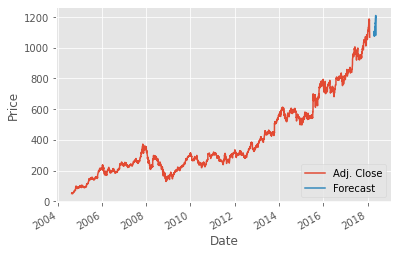

In [27]:
# plotting the graph

df['Adj. Close'].plot()   # known prices
df['Forecast'].plot()   # forecasted prices
plt.legend(loc=4)   # location of the legend on the graph is given by loc
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()